In [38]:
# Re-run this cell
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
crimes = pd.read_csv("crimes.csv", dtype={"TIME OCC": str})
crimes.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA NAME,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Desc,Status Desc,LOCATION
0,220314085,2022-07-22,2020-05-12,1110,Southwest,THEFT OF IDENTITY,27,F,B,NaN,Invest Cont,2500 S SYCAMORE AV
1,222013040,2022-08-06,2020-06-04,1620,Olympic,THEFT OF IDENTITY,60,M,H,NaN,Invest Cont,3300 SAN MARINO ST
2,220614831,2022-08-18,2020-08-17,1200,Hollywood,THEFT OF IDENTITY,28,M,H,NaN,Invest Cont,1900 TRANSIENT
3,231207725,2023-02-27,2020-01-27,0635,77th Street,THEFT OF IDENTITY,37,M,H,NaN,Invest Cont,6200 4TH AV
4,220213256,2022-07-14,2020-07-14,0900,Rampart,THEFT OF IDENTITY,79,M,B,NaN,Invest Cont,1200 W 7TH ST


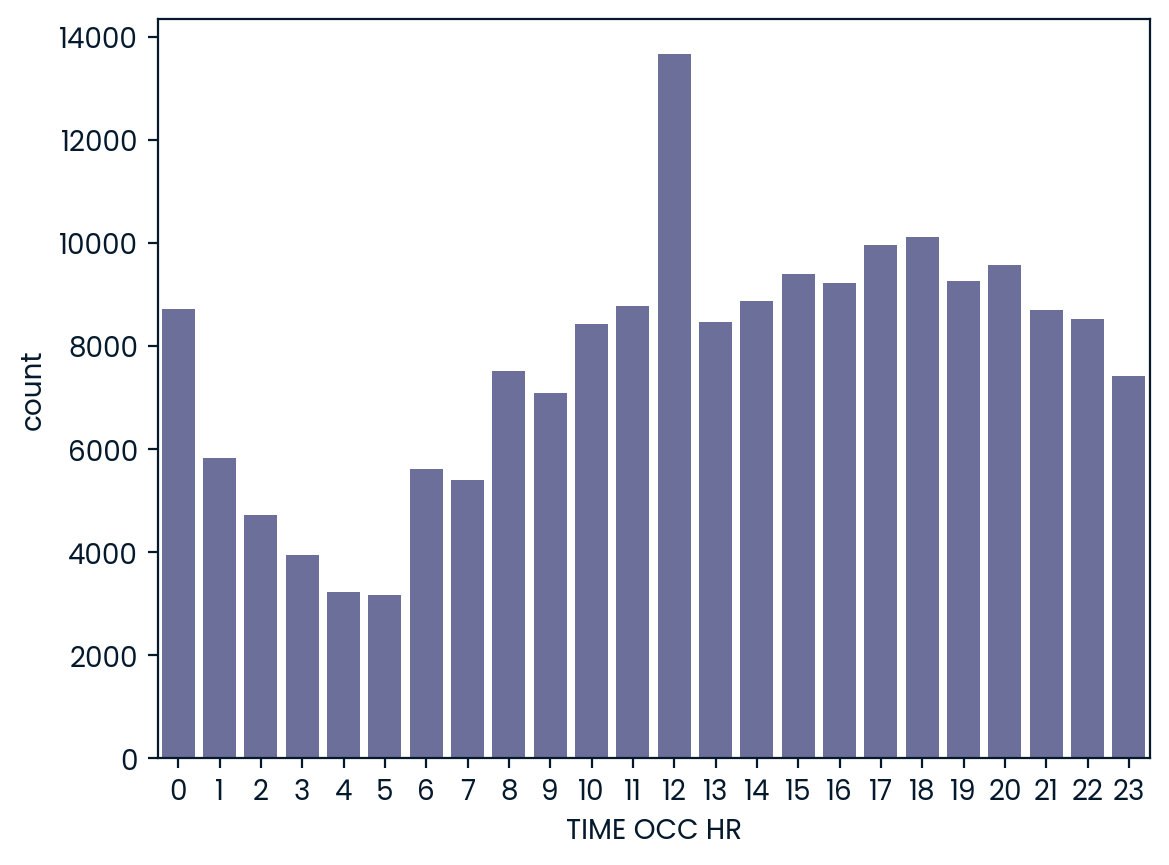

The hour that has the highest frequency of crimes is 12


In [39]:
# Which hour has the highest frequency of crimes? Store as an integer variable called peak_crime_hour.

# create a column that has the hours of time occurence for easy counting
crimes["TIME OCC HR"] = crimes["TIME OCC"].str[:2]
# convert them to integer since it's a string
crimes["TIME OCC HR"] = crimes["TIME OCC HR"].astype(int)

# count them based on hour
sns.countplot(x="TIME OCC HR", data=crimes)
plt.show()

# Get the hour with most crime occurence.
peak_crime_hour = crimes["TIME OCC HR"].value_counts().index[0]
print(f"The hour that has the highest frequency of crimes is {peak_crime_hour}")

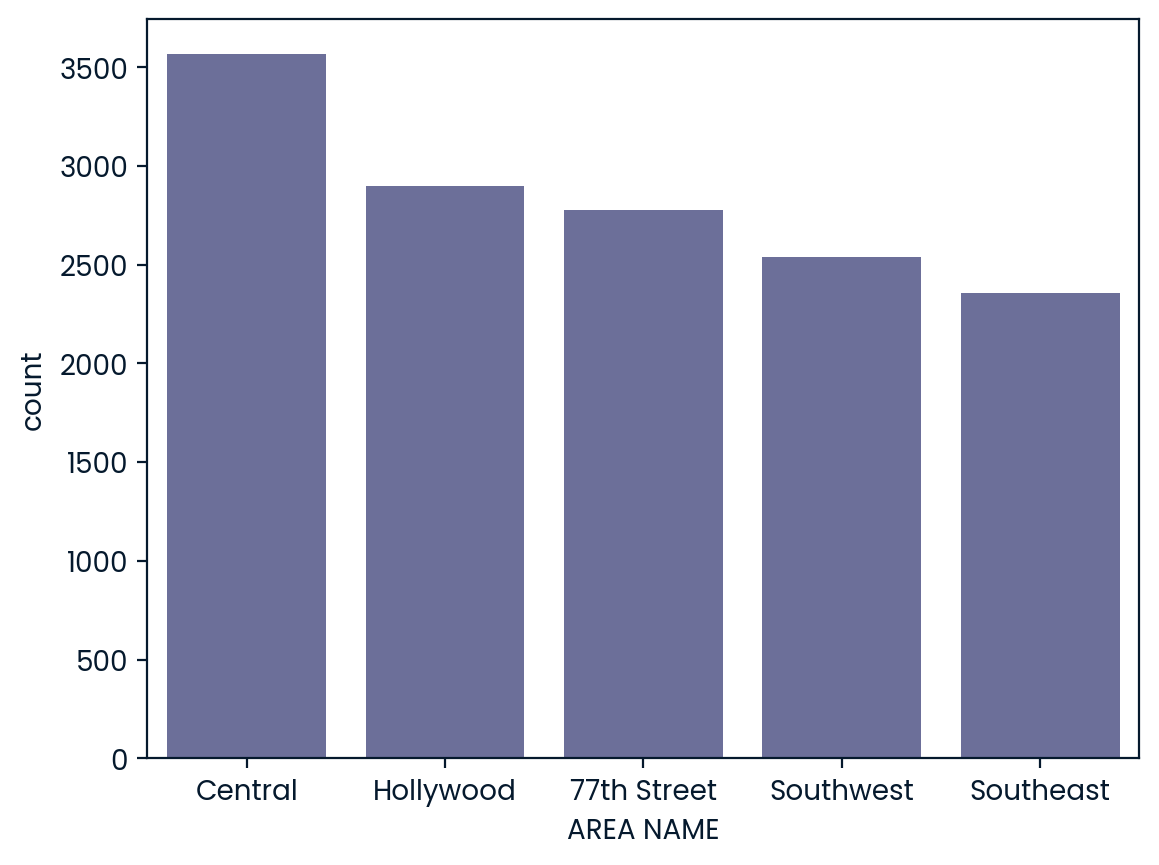

The area that has the largest frequency of night crimes is Central.


In [40]:
# Which area has the largest frequency of night crimes (crimes committed between 10pm and 3:59am)? Save as a string variable called peak_night_crime_location.

# filter the dataset to crimes around 10 pm and 3:59 am in 24 hour format it's between 22 - 04.
crimes_at_night = crimes[(crimes['TIME OCC HR'] >= 22) | (crimes['TIME OCC HR'] <= 4)]

count_order = crimes_at_night["AREA NAME"].value_counts().head(5).index
# count it by area
sns.countplot(x="AREA NAME", data=crimes_at_night, order=count_order)
plt.show()

peak_night_crime_location = count_order[0]
print(f"The area that has the largest frequency of night crimes is {peak_night_crime_location}.")

In [41]:
# Identify the number of crimes committed against victims of different age groups. Save as a pandas Series called victim_ages, with age group labels "0-17", "18-25", "26-34", "35-44", "45-54", "55-64", and "65+" as the index and the frequency of crimes as the values.

# Categorize the victim age for easy counting
age_group_conditions = [
    (crimes["Vict Age"] >= 65),
    (crimes["Vict Age"] >= 55),
    (crimes["Vict Age"] >= 45),
    (crimes["Vict Age"] >= 35),
    (crimes["Vict Age"] >= 26),
    (crimes["Vict Age"] >= 18),
    (crimes["Vict Age"] >= 0),
]

choices = [
    "65+",
    "55-64",
    "45-54",
    "35-44",
    "26-34",
    "18-25",
    "0-17"
]

# Used to place the row into specific category or choices
crimes["Victims Age Group"] = np.select(age_group_conditions, choices, default="None")

# Count the crime by age group
victim_ages = crimes["Victims Age Group"].value_counts()
victim_ages

26-34    47470
35-44    42157
45-54    28353
18-25    28291
55-64    20169
65+      14747
0-17      4528
Name: Victims Age Group, dtype: int64